#### Import

In [3]:
import sys
sys.path.insert(0,'..')
import urx
import time
import math3d as m3d
ur = urx.Robot("192.168.1.10", use_rt=True)
pose = ur.get_pose()
print(pose)
from ddh import DDGripper
from scooping_primitives import HighSpeedScooping
from jupyterthemes import jtplot
white = 1
if white:
    jtplot.style(theme='default', figsize=(32, 10))
else:
    jtplot.style(figsize=(32, 10))

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


<Transform:
<Orientation: 
array([[-9.31207499e-06,  9.84801783e-01, -1.73682032e-01],
       [ 1.00000000e+00,  1.29172669e-05,  1.96270879e-05],
       [ 2.15722883e-05, -1.73682032e-01, -9.84801783e-01]])>
<Vector: (-0.51817, 0.44999, 0.22766)>
>


In [4]:
gripper = DDGripper("ddh_scooping")
scoop = HighSpeedScooping(ur, gripper, "hss_scoop_spd_exp")

reading gripper config...
connecting to odrive...
found left finger
found right fingers
reading scooping config...


In [7]:
scoop.initialize_pose((-0.505,0.45,180))

Setting left tip: (146.56176608219477, 54.49919350964172)
Setting right tip: (140.2583372328852, 20.247714943984874)
Setting pose: 
[-0.5182      0.45        0.25       -2.13015815 -2.13015815  0.18636469]


Start logging
Collision detected!
Setting left tip: (157, 41)
Setting right tip: (157, -41)
Reached zero speed!
==========Scooping completed!==========
Speed at collision: -0.24341 m/s
Distance to decelerate: 0.05760 m
Deceleration for lifting: 0.98751 m/s^2
Slept time for lifting: 0.93 s
Lifted distance: 0.23492 m
Stop logging
Commanded time: 1542 ms
[85.71756132890502, 85.71129725755478, 85.72972123101184, 85.72376054541309, 85.6818764408169, 85.74178379419138, 85.74425778219788, 85.70333058637064, 85.74741175536843, 85.70619313019895, 85.69906995149441, 85.70462110357701, 85.72042646692543, 85.72224303926015, 85.71671136499018, 85.72599120683114, 85.73131604062237, 85.71175814116827, 85.72187822758079, 85.72989259488699, 85.7421741901592, 85.74930290644278, 85.73599582431342, 85.7609509396789, 85.73436909138607, 85.72260357138376, 85.77387098682655, 85.735836753261, 85.79012507396979, 85.79834264284048, 85.81027415266925, 85.79907823313454, 85.8452610957003, 85.88671754003889, 85.85

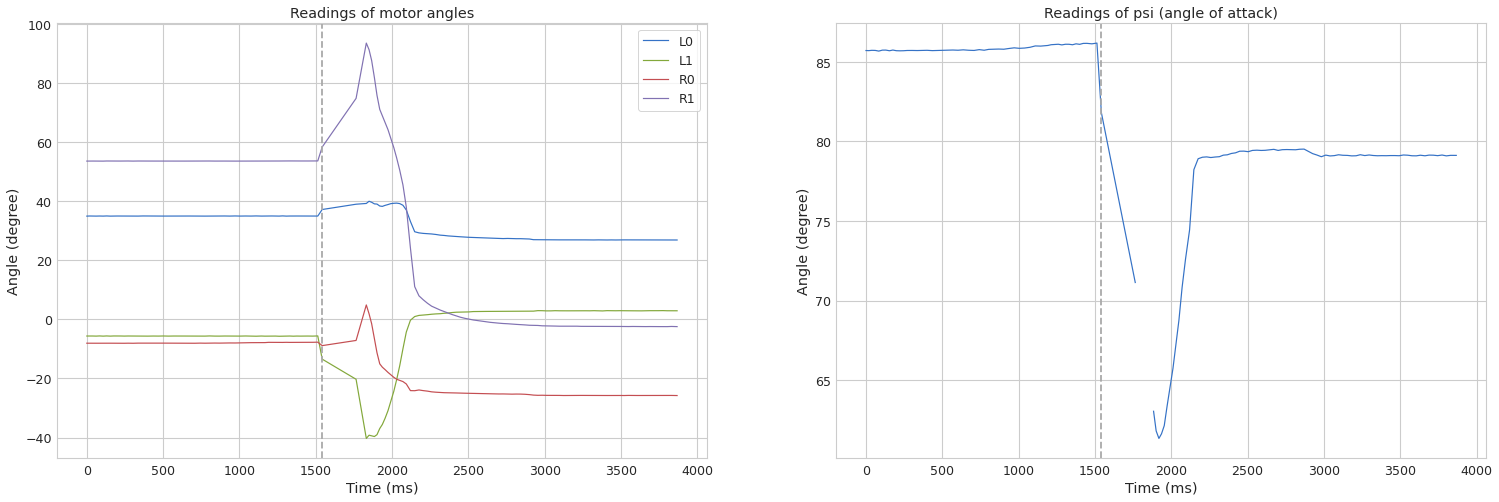

In [8]:
gripper.logged = True
scoop.simple_scoop()
gripper.logged = False    
gripper.display_log(scoop.theta,white)

In [72]:
from ddh import DDGripper
gripper = DDGripper("ddh_scooping")

reading gripper config...
connecting to odrive...
found left finger
found right fingers


In [9]:
gripper.disarm()

In [10]:
gripper.logged = True

Start logging


Stop logging
[31.458298152754505, 31.532765074027875, 31.746433888735563, 32.19288297915398, 33.141568398288655, 34.626219707217416, 35.96317788205985, 37.78107253889846, 40.25091660173419, 41.87942414065131, 42.80476333255805, 43.165951574268746, 41.88519935105484, 41.25206028961068, 41.04699183462802, 42.49158256371956, 43.79809735355835, 44.94156977586701, 45.16652688453104, 44.3501693484657, 43.419067133686326, 42.5293444850457, 41.6806668541125, 40.89742812554465, 40.297633133552466, 39.60795365022551, 39.28619601145098, 39.02174207979638, 39.134456368180736, 39.26232369901979, 39.32028742340728, 39.34880049041638, 39.26542971269808, 39.3142692945849, 39.56866619527614, 39.91549668818456, 40.43293256145742, 40.7230475494334, 40.67617899265437, 40.453047536405194, 40.12671349126953, 39.54496019690933, 38.70640581918681, 37.8511038637277, 36.82287478621444, 35.89699370391824, 35.331028522508205, 34.87557868614658, 34.39950012683883, 33.93492706812074, 33.542240457692145, 33.47757575

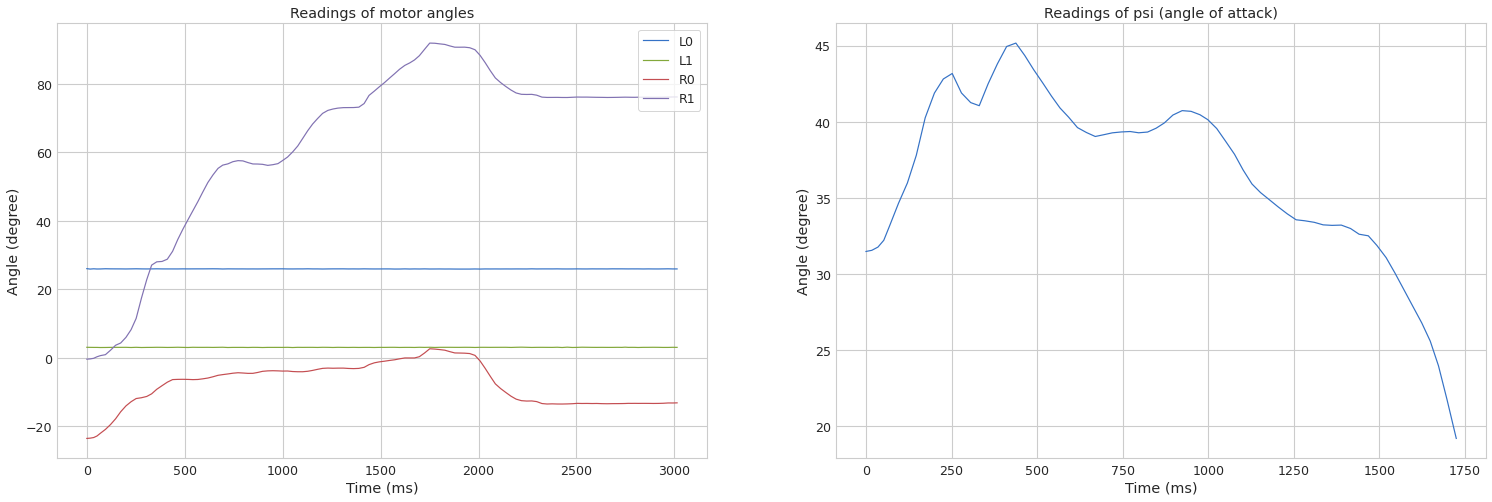

In [11]:
gripper.logged = False
gripper.display_log(30)

#### script testing

In [ ]:
gripper.arm()
gripper.set_stiffness(20)
gripper.set_left_tip((158, 38))
gripper.set_right_tip((158, -38))
# gripper.set_parallel_jaw(-14.5, 0)

In [ ]:
gripper.arm(BW = 0.1)

In [ ]:
gripper.set_left_tip((140, 20))
gripper.set_right_tip((140, -20))

In [ ]:
gripper.set_left_tip((158, 38))
gripper.set_right_tip((158, -38))

#### deceleration control and end pos control

In [ ]:
ur.speedl([0.4,0,0,0,0,0],0.4,10)

In [ ]:
# print(ur.get_tcp_speed(wait=False)[0])
stop_dist = 0.05
end_dist = 0.3
reverse_vel = 0.4
spd_detect = ur.get_tcp_speed(wait=False)[0]
stop_dec = (spd_detect**2)/(2*stop_dist)
ur.speedl([-reverse_vel,0,0,0,0,0],stop_dec,10)
pos_dec = ur.getl()[0]
while ur.get_tcp_speed(wait=False)[0] > 0:
    continue
pos_stop = ur.getl()[0]
print("Reach zero vel!")
t_acc = reverse_vel / stop_dec
s_acc = 0.5 * stop_dec * t_acc**2
t_const = (end_dist-s_acc) / reverse_vel
print(s_acc)
print(t_acc+t_const)
time.sleep(t_acc+t_const)
ur.stopl(5)
pos_end = ur.getl()[0]

In [ ]:
ur.stopl(2)
stop_dist = pos_stop - pos_dec
reverse_dist = pos_end - pos_stop
print(spd_detect)
print(stop_dec)
print(stop_dist)
print(reverse_dist)

In [ ]:
pose = ur.get_pose()
print(pose)
print(ur.getl())

#### scooping test

In [ ]:
scoop.prescoop_initialize((-0.509,0.45,180))
time.sleep(0.5)
a2_init = gripper.right_a2

In [ ]:
# smack and scoop
smack_vel = 0.3 #100
smack_acc = 0.3 #0.3
stop_smack_acc = 3 #7
reverse_vel = 0.3 # 250
reverse_acc = 0.35 #1
stop_acc = 0.5 #0.5
stop_dist = 0.01

# robot accelerate
ur.speedl([0,0,-smack_vel,0,0,0],smack_acc,5)
# robot detect collision, then stop, close gripper, and go up
while 1:
    a2_cur = gripper.right_a2
    #print(a2_cur)
    if a2_cur - a2_init > 0.3:
        print ("Collision detected!")
        z_spd = ur.get_tcp_speed(wait=False)[2]
        stop_dec = (z_spd**2)/(2*stop_dist)
        gripper.set_stiffness(20, 'R')
#         gripper.set_left_tip((158, 38))
#         gripper.set_right_tip((158, -38))
        gripper.set_left_tip((157, 41))
        gripper.set_right_tip((157, -41))
#         ur.stopl(stop_smack_acc)
        gripper.set_stiffness(100)
        ur.speedl([0,0,reverse_vel,0,0,0],stop_smack_acc,5)
        time.sleep(0.2)
        ur.stopl(stop_acc)
        break

In [ ]:
print(z_spd)
print(stop_dec)

In [ ]:
gripper.set_left_tip((157, 41))
gripper.set_right_tip((157, -41))

In [ ]:
ur.stopl()